<img src="imgs\banner_fcd.jpg" alt="bannersp" width="1100"  height="150">

## <span style="color:#2F749F;"><strong>📦 Sesión práctica 2: Análisis Univariado, bivariado y multivariado</strong></span>
---
<p align="right">
  <a href="https://colab.research.google.com/#create=true" target="_blank">
    <img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Abrir en Colab"/>
  </a>
</p>


## <span style="color:black;"><strong>Datos del estudiante</strong></span>

In [1]:
nombre = input("📝 Ingresa tu nombre completo: ")
correo = input("📧 Ingresa tu correo electrónico: ")
cedula = input("🔢 Ingresa los últimos 6 dígitos de tu cédula: ")

📝 Ingresa tu nombre completo: Guillermo Mejia Uribe
📧 Ingresa tu correo electrónico: guillermo.mejia@udea.edu.co
🔢 Ingresa los últimos 6 dígitos de tu cédula: 1037643854


## <span style="color:black;"><strong>Parte 1: Análisis Univariado</strong></span>

### <span style="color:#2F749F;"><strong>Ejercicio 1: Cálculo de medidas de tendencia central</strong></span>

A partir de una muestra simulada de ingresos, calcula la **media, mediana y moda**, y luego a interpretarlas.

1. Usa el número base `528310` (debes reemplazarlo con los últimos 6 dígitos de tu documento de identificación).  
2. Con este número genera una semilla (`np.random.seed`) para que los resultados sean reproducibles.  
3. Los ingresos se simulan con una distribución normal:  
   - Media teórica: `(base % 10) + 2`  
   - Desviación estándar: `2`  
   - Tamaño de muestra: `30`  
4. Los valores negativos se reemplazan por cero (pues los ingresos no pueden ser negativos).  
5. Grafica tus resultados (ver imagen de ejemplo)

<p align="center">
    <img src="imgs\sp_2_e1.png" alt="sp_2_e1" width="900"  height="400">
</p>


Media consumo mensual (GB)     : 6.35
Mediana consumo mensual (GB)   : 6.62
Moda consumo mensual (GB)      : 6.57


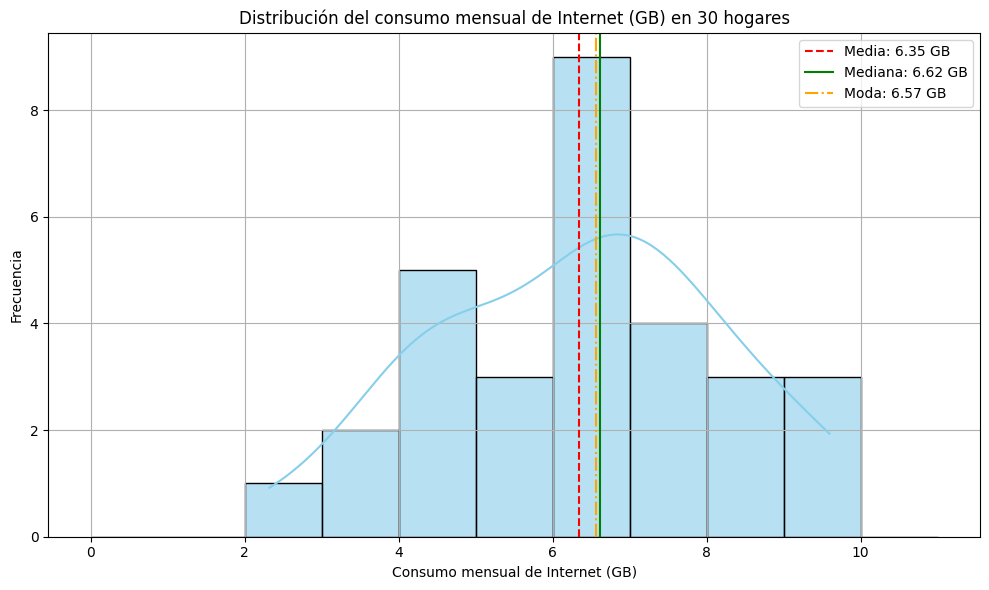

In [37]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statistics import mean, median

# Generacion de semilla
base = 643854
np.random.seed(base)

mt = (base % 10) + 2
sigma = 2
n = 30

# Simulacion
consumo_gb = np.random.normal(loc=mt, scale=sigma, size=n)

# Reemplazo de valores negativos
consumo_gb = np.clip(consumo_gb, a_min=0, a_max=None)

# Medidas de tendencia central
media = mean(consumo_gb)
mediana = median(consumo_gb)

# Moda por histograma
counts, edges = np.histogram(consumo_gb, bins="auto")
i_max = np.argmax(counts)
m_hist = (edges[i_max] + edges[i_max+1]) / 2

# Impresion de resultados
print(f"Media consumo mensual (GB)     : {media:.2f}")
print(f"Mediana consumo mensual (GB)   : {mediana:.2f}")
print(f"Moda consumo mensual (GB)      : {m_hist:.2f}")

# Gráfica histograma + KDE

bins = np.arange(0, 12, 1)
plt.figure(figsize=(10,6))
sns.histplot(consumo_gb, bins=bins, kde=True, color='skyblue', edgecolor='black', alpha=0.6)
plt.axvline(media, color='red', linestyle='--', label=f'Media: {media:.2f} GB')
plt.axvline(mediana, color='green', linestyle='-', label=f'Mediana: {mediana:.2f} GB')
plt.axvline(m_hist, color='orange', linestyle='-.', label=f'Moda: {m_hist:.2f} GB')
plt.title("Distribución del consumo mensual de Internet (GB) en 30 hogares")
plt.xlabel("Consumo mensual de Internet (GB)")
plt.ylabel("Frecuencia")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# **Analisis interpretativo:**

1. **Contexto:** se simuló el consumo mensual de internet (en GB) de 30 hogares usando una distribución normal con media teórica basada en tu número base. Se reemplazaron los valores negativos por cero para reflejar que ningún hogar consume menos de 0 GB.

2. **Interpretación de media, mediana y moda:**

    * Media (6.35 GB): es el consumo promedio de internet de todos los hogares. Indica que, en conjunto, los hogares consumen alrededor de 6,35 GB al mes.

    * Mediana (6.62 GB): es el valor central cuando se ordenan los consumos de menor a mayor. Significa que la mitad de los hogares consume menos de 6,62 GB y la otra mitad más de esa cantidad.

    * Moda (≈6.57 GB, por histograma): representa el rango de consumo más frecuente. Como los datos son continuos, no hay valores exactos repetidos; por eso se usa el histograma para ubicar la zona donde se concentran más hogares. En este caso, alrededor de 6,5 GB es donde más se agrupan los consumos.

    Es normal que media, mediana y moda no coincidan exactamente porque la distribución no es perfectamente simétrica y, además, tiene truncamiento en cero. La cercanía entre 6,3 y 6,6 indica que no hay valores extremos muy alejados.

3. **Lectura del histograma:**

    El histograma muestra la frecuencia de hogares en cada rango de consumo. Se observa una concentración de datos entre 6 y 7 GB, lo que coincide con la moda hallada por histograma. Esto significa que la mayoría de los hogares consume internet dentro de ese rango. La forma del histograma es ligeramente asimétrica, con algunos hogares por debajo de 5 GB y algunos llegando a 9 GB, lo cual empuja un poco la media hacia arriba. La curva gaussiana superpuesta representa la distribución normal teórica con la misma media y desviación estándar de los datos, y permite comparar visualmente si el consumo mensual de internet sigue un patrón aproximadamente normal.

### <span style="color:#2F749F;"><strong>Ejercicio 2: Cálculo de medidas de dispersión</strong></span>

A partir de la muestra generada en el Ejercicio 1, analiza qué tan dispersos están los datos respecto a su media. Calcula:
1. Rango
2. Varianza
3. Desviación estándar
4. Coeficiente de variación
5. Genera una gráfica con los resultados obtenidos (ver imagen de ejemplo)

<p align="center">
    <img src="imgs\sp_2_e2.png" alt="sp_2_e2" width="900"  height="400">
</p>

Media (GB): 6.35
Mínimo (GB): 2.32
Máximo (GB): 9.59
Rango (GB): 7.27
Varianza: 3.44
Desviación estándar: 1.86
Coef. de variación: 0.29


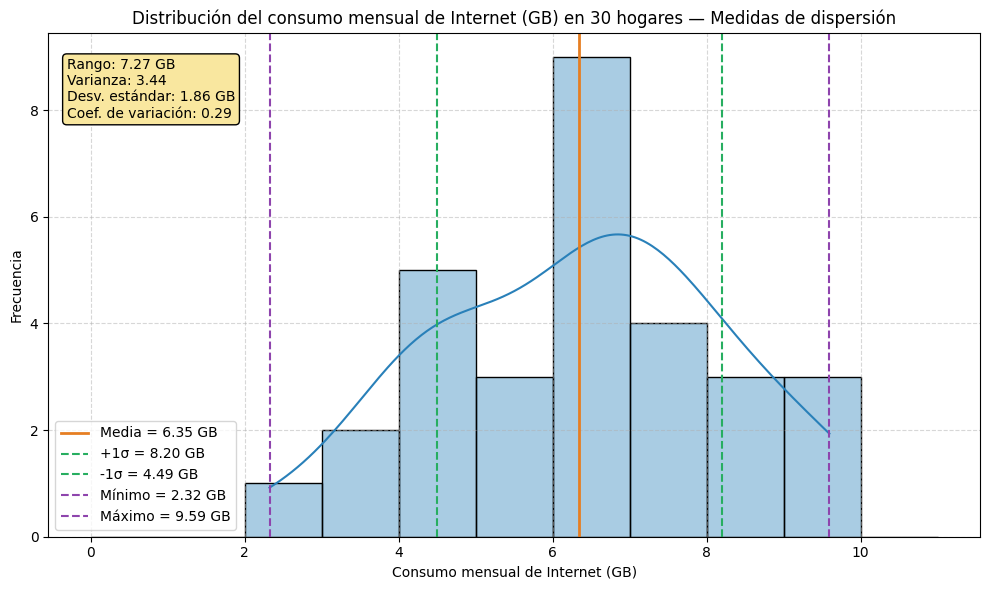

In [39]:
# Medidas de dispercion
media = np.mean(consumo_gb)
minimo = np.min(consumo_gb)
maximo = np.max(consumo_gb)
rango = maximo - minimo
varianza = np.var(consumo_gb, ddof=1)
desviacion = np.std(consumo_gb, ddof=1)
coef_var = desviacion / media

print(f"Media (GB): {media:.2f}")
print(f"Mínimo (GB): {minimo:.2f}")
print(f"Máximo (GB): {maximo:.2f}")
print(f"Rango (GB): {rango:.2f}")
print(f"Varianza: {varianza:.2f}")
print(f"Desviación estándar: {desviacion:.2f}")
print(f"Coef. de variación: {coef_var:.2f}")

# Gráfica histograma + KDE
bins = np.arange(0, 12, 1)

plt.figure(figsize=(10,6))
sns.histplot(consumo_gb, bins=bins, kde=True, color="#2980b9", edgecolor="black", alpha=0.4)

# Líneas de media y ±1 desviación estándar
plt.axvline(media, color='#e67e22', linestyle='-', linewidth=2, label=f'Media = {media:.2f} GB')
plt.axvline(media + desviacion, color='#27ae60', linestyle='--', label=f'+1σ = {media + desviacion:.2f} GB')
plt.axvline(media - desviacion, color='#27ae60', linestyle='--', label=f'-1σ = {media - desviacion:.2f} GB')
plt.axvline(minimo, color='#8e44ad', linestyle='--', label=f'Mínimo = {minimo:.2f} GB')
plt.axvline(maximo, color='#8e44ad', linestyle='--', label=f'Máximo = {maximo:.2f} GB')

# Recuadro con estadísticas
texto = (f"Rango: {rango:.2f} GB\n"
         f"Varianza: {varianza:.2f}\n"
         f"Desv. estándar: {desviacion:.2f} GB\n"
         f"Coef. de variación: {coef_var:.2f}")
plt.text(0.02, 0.95, texto, transform=plt.gca().transAxes,
         fontsize=10, verticalalignment='top',
         bbox=dict(boxstyle='round', facecolor='#f9e79f', edgecolor='black'))

plt.title("Distribución del consumo mensual de Internet (GB) en 30 hogares — Medidas de dispersión")
plt.xlabel("Consumo mensual de Internet (GB)")
plt.ylabel("Frecuencia")
plt.legend()
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

# **Analisis interpretativo: Medidas de dispersión**

1. **Contexto:** se evaluó qué tan separados o variados están los consumos mensuales de internet de 30 hogares respecto a su media. Este análisis permite comprender la amplitud y consistencia del consumo en la muestra, más allá del promedio.

2. **Interpretación de las medidas de dispersión:**

    * Rango (7.27 GB): el consumo mínimo fue de 2.32 GB y el máximo de 9.59 GB, dando un rango de 7.27 GB. Esto indica que entre el hogar que menos consume y el que más consume hay una brecha significativa, aunque todos siguen dentro de un rango plausible para consumo mensual.

    * Varianza (3.44) y desviación estándar (1.86 GB): la varianza calculada fue de 3.44, y la desviación estándar de 1.86 GB. Esta desviación indica que, en promedio, los hogares se apartan 1.86 GB del consumo medio (6.35 GB). Una desviación estándar moderada muestra que la mayoría de los hogares se concentra alrededor de la media con algunas variaciones naturales.

    * Coeficiente de variación (0.29): el coeficiente obtenido fue 0.29 (29 % de la media). Esto significa que la variabilidad equivale a aproximadamente 29 % de la media. Un coeficiente de variación inferior al 50 % indica que la variable es relativamente homogénea respecto a su promedio.

3. **Lectura del gráfico con líneas de dispersión:**

    * Las líneas moradas de ±1 desviación estándar muestran el rango donde se encuentra la mayor parte de los hogares, aproximadamente de 4.49 GB (6.35–1.86) a 8.21 GB (6.35+1.86). Esto facilita ver de un vistazo cuántos consumos están “dentro de lo normal”.

    * Las líneas de mínimo y máximo evidencian los extremos de consumo (2.32 GB y 9.59 GB), permitiendo ver rápidamente la amplitud total de los datos.

El consumo mensual de internet presenta variabilidad moderada, con la mayoría de hogares dentro del rango típico marcado por la desviación estándar. Existen algunos hogares con consumos más bajos y otros con consumos más altos que amplían el rango, pero en general los patrones de uso son relativamente consistentes. Esto significa que, aunque hay diferencias individuales, la mayoría de los hogares comparte un nivel de consumo similar.

### <span style="color:#2F749F;"><strong>Ejercicio 3: Cálculo de medidas de distribución</strong></span>

A partir de la muestra generada en el Ejercicio 1, analiza la distribución de los datos. Calcula:
1. Asimetría
2. Curtosis
3. Realiza la comparación con la distribución normal (ver la imagen de ejemplo)

<p align="center">
    <img src="imgs\sp_2_e3.png" alt="sp_2_e3" width="900"  height="400">
</p>



Media: 6.35 GB
Mediana: 6.62 GB
Moda: 2.32 GB
Asimetría: -0.13
Curtosis: -0.67


/tmp/ipython-input-1323769647.py:30: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "b-" (-> color='b'). The keyword argument will take precedence.
  plt.plot(x, p * n * (xmax - xmin) / 10, 'b-', color='#34495e', lw=2, label='Distribución normal ajustada')


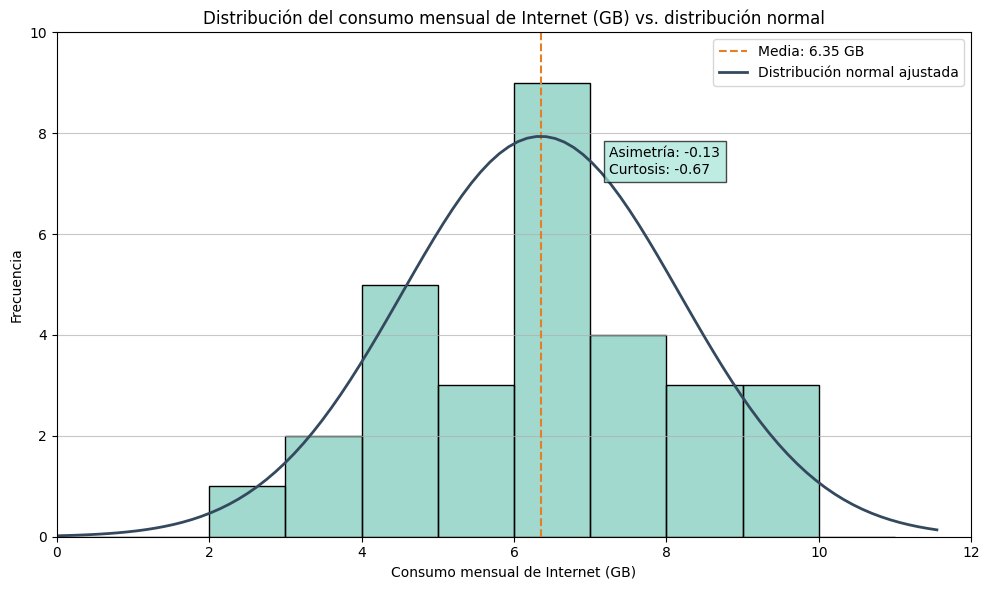

In [51]:
from scipy import stats

# Medidas de tendencia central
media = np.mean(consumo_gb)
mediana = np.median(consumo_gb)
moda_result = stats.mode(consumo_gb, keepdims=True)
moda = round(moda_result.mode[0],2)

# Medidas de distribución
asimetria = stats.skew(consumo_gb)
curtosis = stats.kurtosis(consumo_gb)

print(f"Media: {media:.2f} GB")
print(f"Mediana: {mediana:.2f} GB")
print(f"Moda: {moda:.2f} GB")
print(f"Asimetría: {asimetria:.2f}")
print(f"Curtosis: {curtosis:.2f}")

# Graficar
plt.figure(figsize=(10,6))

# Histograma + KDE
sns.histplot(consumo_gb, bins=bins, kde=False, color="#16a085", edgecolor="black", alpha=0.4)
plt.axvline(media, color='#e67e22', linestyle='--', label=f'Media: {media:.2f} GB')

# Distribución normal teórica ajustada a los datos
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = stats.norm.pdf(x, media, np.std(consumo_gb))
plt.plot(x, p * n * (xmax - xmin) / 10, 'b-', color='#34495e', lw=2, label='Distribución normal ajustada')

# Mostrar asimetría y curtosis en el gráfico
plt.text(media + 0.9, max(np.histogram(consumo_gb, bins=bins)[0]) * 0.8,
         f"Asimetría: {asimetria:.2f}\nCurtosis: {curtosis:.2f}",
         bbox=dict(facecolor='#a3e4d7', alpha=0.7))

plt.title("Distribución del consumo mensual de Internet (GB) vs. distribución normal")
plt.xlabel("Consumo mensual de Internet (GB)")
plt.ylabel("Frecuencia")
plt.xlim(0, 12)
plt.ylim(0, 10)
plt.grid(axis='y', linestyle='-', alpha=0.7)
plt.legend()
plt.tight_layout()
plt.show()

# **Analisis interpretativo: Medidas de distribución**

1. **Contexto:** se analizó la forma de la distribución del consumo mensual de Internet (en GB) de los 30 hogares. El objetivo fue identificar si la distribución es simétrica o presenta sesgos, y si su forma es más o menos “picuda” respecto a una distribución normal.

2. **Interpretación de las medidas de dispersión:**

    * Asimetría (-0.13): un valor cercano a 0 indica que la distribución es prácticamente simétrica. El signo negativo (−0.13) sugiere una ligerísima inclinación hacia la izquierda, es decir, algunos hogares tienen consumos un poco más bajos que el promedio, pero no es un sesgo fuerte.

    * Curtosis (-0.67): una curtosis igual a 0 corresponde a una distribución normal. El valor negativo (−0.67) significa que la distribución es platicúrtica, es decir, tiene un pico menos pronunciado y colas más ligeras que la normal. En otras palabras, los datos están algo más “extendidos” hacia los lados pero con menos extremos que una distribución normal perfecta.

3. **Lectura del gráfico con comparación normal:**

    * La curva normal ajustada superpuesta al histograma permite comparar visualmente la distribución real con la ideal normal. Se observa que la forma del consumo mensual de Internet es bastante parecida a la normal, con ligeras diferencias en la altura del pico y en las colas.

    * El recuadro con asimetría y curtosis resume cuantitativamente esta comparación, reforzando que la distribución es casi simétrica y ligeramente más aplanada que una normal estándar.

El consumo mensual de Internet en 30 hogares presenta una distribución muy próxima a la normal, con un sesgo prácticamente nulo y un perfil algo más plano. Esto indica que la mayoría de los hogares se agrupan en torno al promedio sin grandes extremos, lo que facilita interpretar y predecir patrones de consumo a partir de la media.

### <span style="color:#2F749F;"><strong>Ejercicio 4: Cálculo de medidas de percentiles</strong></span>

A partir de la muestra generada en el Ejercicio 1, calcula los percentiles de tus datos. Calcula:
1. Percentiles
2. Deciles
3. Cuartiles
4. Grafica los anteriores percentiles calculados, sobre la distribución de tus datos (ver la imagen de ejemplo)

<p align="center">
    <img src="imgs\sp_2_e4.png" alt="sp_2_e4" width="900"  height="400">
</p>


Percentiles (P10, P25, P50, P75, P90): [4.10510087 4.77613738 6.61961302 7.69856436 8.5685152 ]
Deciles (D1 a D9): [4.10510087 4.63914341 5.02197039 6.13327326 6.61961302 6.85321117
 7.2379666  7.99657676 8.5685152 ]
Cuartiles (Q1, Q2, Q3): [4.77613738 6.61961302 7.69856436]


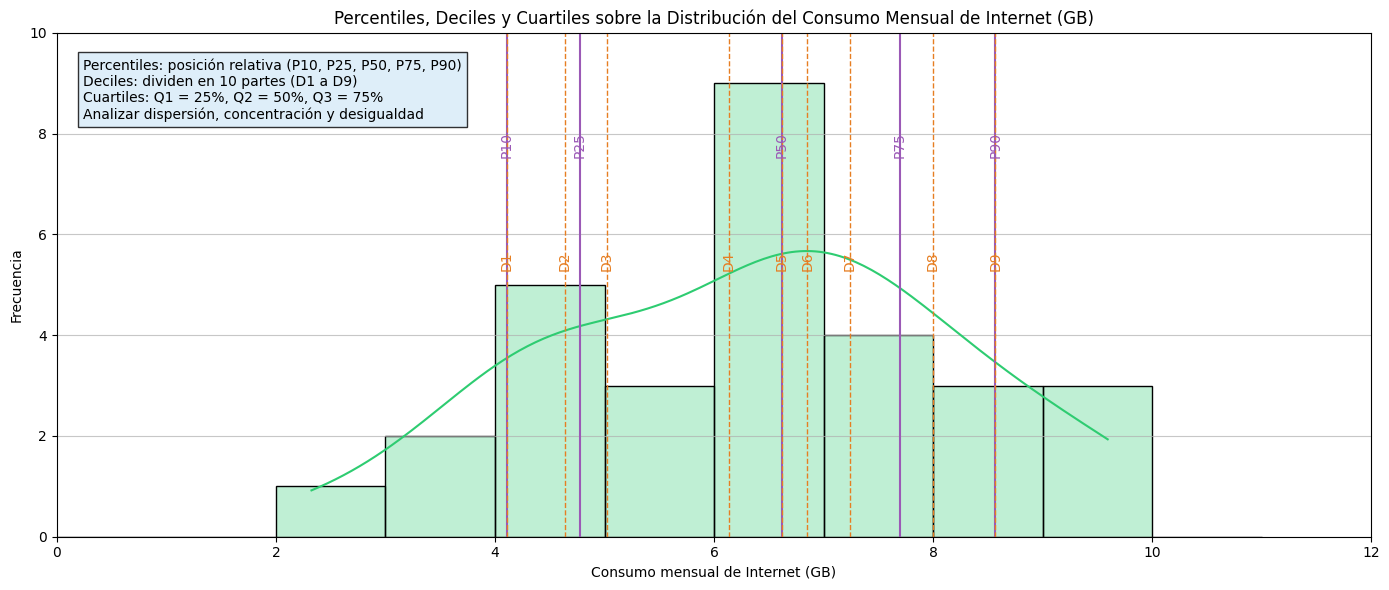

In [55]:
# Calculo de percentiles, deciles y cuartiles
percentiles = np.percentile(consumo_gb, [10, 25, 50, 75, 90])  # P10, P25, P50, P75, P90
deciles = np.percentile(consumo_gb, np.arange(10, 100, 10))    # D1 a D9
cuartiles = np.percentile(consumo_gb, [25, 50, 75])            # Q1, Q2, Q3

print("Percentiles (P10, P25, P50, P75, P90):", percentiles)
print("Deciles (D1 a D9):", deciles)
print("Cuartiles (Q1, Q2, Q3):", cuartiles)

# Graficar
plt.figure(figsize=(14, 6))

# Histograma
sns.histplot(consumo_gb, bins=bins, kde=True, color="#2ecc71", edgecolor="black", alpha=0.3)

# Percentiles principales
for p, val in zip([10, 25, 50, 75, 90], percentiles):
    plt.axvline(val, color='#9b59b6', linestyle='-', linewidth=1.5)
    plt.text(val, plt.ylim()[1]*0.85, f'P{p}', rotation=90, color='#9b59b6', va='top', ha='center')

# Deciles
for i, val in enumerate(deciles, 1):
    plt.axvline(val, color='#e67e22', linestyle='--', linewidth=1)
    plt.text(val, plt.ylim()[1]*0.6, f'D{i}', rotation=90, color='#e67e22', va='top', ha='center')

plt.title("Percentiles, Deciles y Cuartiles sobre la Distribución del Consumo Mensual de Internet (GB)")
plt.xlabel("Consumo mensual de Internet (GB)")
plt.ylabel("Frecuencia")
plt.xlim(0, 12)
plt.ylim(0, 10)
plt.grid(axis='y', linestyle='-', alpha=0.7)

# Cuadro de texto explicativo
plt.text(0.02, 0.95,
         "Percentiles: posición relativa (P10, P25, P50, P75, P90)\n"
         "Deciles: dividen en 10 partes (D1 a D9)\n"
         "Cuartiles: Q1 = 25%, Q2 = 50%, Q3 = 75%\n"
         "Analizar dispersión, concentración y desigualdad",
         transform=plt.gca().transAxes,
         bbox=dict(facecolor='#d6eaf8', alpha=0.8), ha="left", va="top")

plt.tight_layout()
plt.show()

# **Analisis interpretativo: Percentiles, Deciles y Cuartiles**

1. **Contexto:** se analizaron los percentiles, deciles y cuartiles del consumo mensual de Internet (en GB) en 30 hogares. Estas medidas no solo indican la tendencia central, sino también la posición relativa de los datos dentro de la distribución y permiten identificar niveles de concentración y dispersión.

2. **Interpretación de las medidas de dispersión:**

    * Percentiles:

      * P10 = 4.11 GB: el 10 % de los hogares consume menos de 4.11 GB.

      * P25 = 4.78 GB: el 25 % consume menos de 4.78 GB (primer cuartil).

      * P50 = 6.62 GB: el 50 % consume menos de 6.62 GB (mediana).

      * P75 = 7.70 GB: el 75 % consume menos de 7.70 GB.

      * P90 = 8.57 GB: el 90 % consume menos de 8.57 GB.

      Estos valores permiten ver cómo se distribuye el consumo en distintos puntos y muestran claramente dónde se concentran los hogares.

    * Deciles (D1–D9):

      Dividen los datos en 10 tramos del 10 %. Por ejemplo:

      * D1 (4.11 GB) marca el 10 % inferior.

      * D5 (6.62 GB) corresponde a la mediana.

      * D9 (8.57 GB) marca el límite del 90 % superior.

      Estos deciles facilitan ver la concentración y desigualdad de los consumos entre grupos de hogares.

    * Cuartiles (Q1, Q2, Q3):

      Dividen los datos en 10 tramos del 10 %. Por ejemplo:

      * Q1 = 4.78 GB: el 25 % consume menos de este valor.

      * Q2 = 6.62 GB: mediana, el 50 % consume menos y el 50 % más.

      * Q3 = 7.70 GB: el 75 % consume menos de este valor.

      Esto permite dividir la población en cuatro grupos de igual tamaño, reflejando la dispersión entre hogares de bajo, medio y alto consumo.

3. **Lectura del gráfico con líneas de percentiles y deciles:**

    * Las líneas púrpura (percentiles) y naranjas (deciles) sobre el histograma indican los cortes clave para ubicar hogares en percentiles y deciles.

El consumo mensual de Internet en 30 hogares se distribuye de forma bastante concentrada entre 4 y 9 GB, con un 50 % central entre 4.78 y 7.70 GB y pocos hogares en los extremos. La combinación de percentiles, deciles y cuartiles, representados con colores diferenciados, ayuda a visualizar claramente la dispersión, concentración y desigualdad relativa del consumo en la muestra.

## <span style="color:black;"><strong>Parte 2: Análisis Bivariado</strong></span>

### <span style="color:#2F749F;"><strong>Ejercicio 5: Análisis de correlación</strong></span>

En esta segunda parte, genera **dos variables** a partir de tú número de cédula y realiza un análisis **bivariado** para calcular la relación entre ellas.

1. Use los **6 últimos dígitos** de su cédula como base (similar al Ejercicio 1).  
2. Genere dos variables aleatorias (ejemplo: `ingresos` y `gastos`) con distribución normal, usando esa base como **semilla reproducible**.  
3. Calcule los coeficientes de correlación de **Pearson** y **Spearman**.
4. Grafique las variables analizadas (ver la imagen de ejemplo)
5. Interprete los resultados.  

<p align="center">
    <img src="imgs\sp_2_e5.png" alt="sp_2_e5" width="900"  height="400">
</p>

Coeficiente de correlación de Pearson:  0.58, p-valor: 0.000
Coeficiente de correlación de Spearman: 0.53, p-valor: 0.000


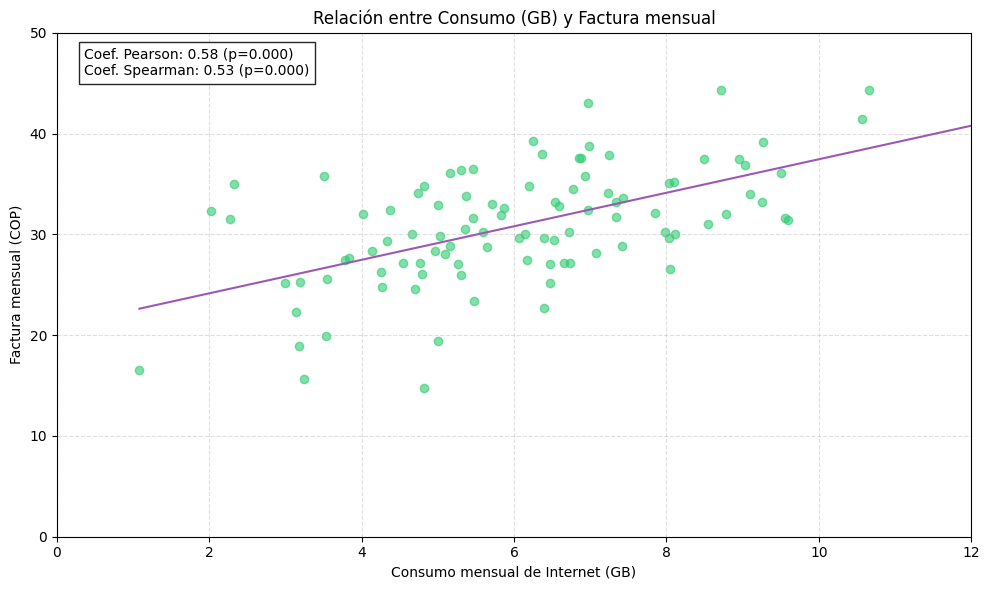

In [67]:
# Semilla y tamaño de muestra
base = 643854
np.random.seed(base)
n = 100

# Variable X: Consumo mensual de Internet (GB)
mt = (base % 10) + 2
sigma = 2
consumo_gb = np.random.normal(loc=mt, scale=sigma, size=n)
consumo_gb = np.clip(consumo_gb, a_min=0, a_max=None)

# Variable Y: factura mensual (COP)
costo_base = 20.0             # costo fijo del plan
precio_por_gb = 1.8           # cargo variable por GB
ruido = np.random.normal(loc=0, scale=5, size=n)
factura = costo_base + precio_por_gb * consumo_gb + ruido

# Correlaciones (Pearson y Spearman)
pearson_corr, p_pearson   = stats.pearsonr(consumo_gb, factura)
spearman_corr, p_spearman = stats.spearmanr(consumo_gb, factura)

print(f"Coeficiente de correlación de Pearson:  {pearson_corr:.2f}, p-valor: {p_pearson:.3f}")
print(f"Coeficiente de correlación de Spearman: {spearman_corr:.2f}, p-valor: {p_spearman:.3f}")

# Graficar
plt.figure(figsize=(10,6))
sns.regplot(
    x=consumo_gb, y=factura, ci=None,
    scatter_kws={"alpha":0.6, "color":"#2ecc71"},
    line_kws={"color":"#9b59b6", "linewidth":1.5}
)

plt.title("Relación entre Consumo (GB) y Factura mensual")
plt.xlabel("Consumo mensual de Internet (GB)")
plt.ylabel("Factura mensual (COP)")
plt.xlim(0, 12)
plt.ylim(0, 50)

plt.text(
    0.03, 0.97,
    f"Coef. Pearson: {pearson_corr:.2f} (p={p_pearson:.3f})\n"
    f"Coef. Spearman: {spearman_corr:.2f} (p={p_spearman:.3f})",
    transform=plt.gca().transAxes,
    bbox=dict(facecolor='white', alpha=0.85),
    va='top', ha='left'
)

plt.grid(True, linestyle='--', alpha=0.4)
plt.tight_layout()
plt.show()

# **Analisis interpretativo: Correlación entre Consumo y Factura**

1. **Contexto:** se evaluó la relación entre el consumo mensual de Internet (GB) y la factura mensual (COP) de 100 registros simulados. El objetivo es ver si a mayor consumo de Internet se incrementa proporcionalmente el costo mensual y qué tan fuerte es esa relación.

2. **Interpretación de los coeficientes de correlación:**

    * Coeficiente de Pearson (0.58, p=0.000): mide la relación lineal entre consumo y factura. Un valor de 0.58 indica una correlación positiva moderada: cuando aumenta el consumo de Internet (GB), la factura mensual también tiende a subir. El p-valor de 0.000 confirma que esta relación es estadísticamente significativa.

    * Coeficiente de Spearman (0.53, p=0.000): mide la relación monótona (orden creciente) entre las variables. Un valor de 0.53 refuerza que, en general, los hogares con mayor consumo tienden también a tener facturas más altas, incluso cuando hay variaciones puntuales.

    La similitud entre ambos coeficientes indica que la relación es consistente tanto en términos lineales como en el orden de los datos.

3. **Lectura del gráfico de dispersión:**

    * Los puntos verdes representan los hogares con su consumo mensual (GB) en el eje X y su factura mensual (COP) en el eje Y. Se observa un patrón ascendente claro: a medida que crece el consumo, la factura tiende a ser mayor.

    * La línea púrpura representa la recta de regresión que resume la tendencia central entre consumo y factura. Al estar inclinada positivamente, refuerza la correlación positiva.

Los resultados evidencian una relación positiva moderada entre el consumo mensual de Internet y la factura mensual. Esto significa que, en promedio, los hogares que consumen más GB pagan más, aunque la relación no es perfecta porque influyen factores adicionales como promociones, planes o variaciones en el costo. Este análisis bivariado confirma que las dos variables están relacionadas de manera significativa y permite anticipar la factura a partir del consumo.

### <span style="color:#2F749F;"><strong>Ejercicio 6: Chi-Cuadrado</strong></span>

En esta parte, analiza si existe **asociación estadística** entre dos variables categóricas simuladas a partir de tu número de cédula.

1. Usa los **6 últimos dígitos** de tu cédula como base para generar una semilla reproducible.
2. Simula una muestra de **60 personas** con dos variables categóricas:
   - `Nivel educativo`: Básico, Medio, Superior.
   - `Acceso a internet`: Sí, No.
3. Crea una **tabla de contingencia** entre ambas variables.
4. Aplica la **prueba de Chi cuadrado de independencia**.
5. Visualiza la distribución conjunta con un mapa de calor (ver la imagen de con la información de ejemplo).
6. Interpreta el resultado.

<p align="center">
    <img src="imgs\sp_2_e6.png" alt="sp_2_e6" width="900"  height="700">
</p>

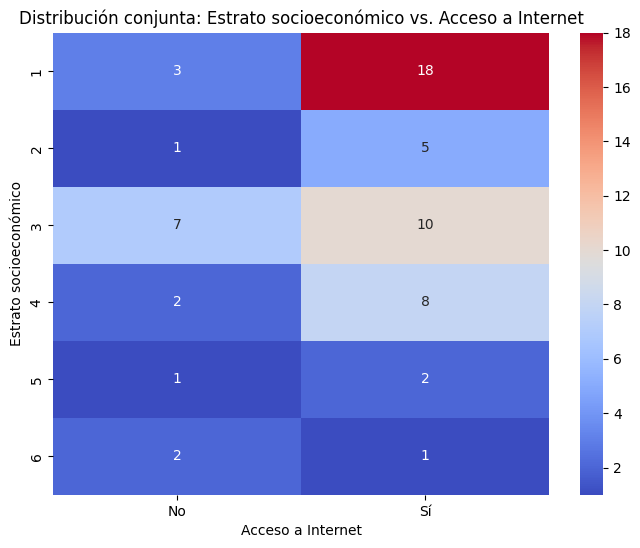

Tabla de contingencia:
 Acceso a Internet  No  Sí
Estrato                  
1                   3  18
2                   1   5
3                   7  10
4                   2   8
5                   1   2
6                   2   1 

Chi-cuadrado: 6.53
Grados de libertad: 5
P-valor: 0.2577
Frecuencias esperadas:
 [[ 5.6        15.4       ]
 [ 1.6         4.4       ]
 [ 4.53333333 12.46666667]
 [ 2.66666667  7.33333333]
 [ 0.8         2.2       ]
 [ 0.8         2.2       ]]


In [76]:
import pandas as pd
from scipy.stats import chi2_contingency

# Semilla y tamaño de muestra
base = 643854
np.random.seed(base)
n = 60

# Variable 1: Estrato socioeconómico (1 a 6)
estratos = [1, 2, 3, 4, 5, 6]
p_estratos = [0.30, 0.25, 0.20, 0.12, 0.08, 0.05]
estrato = np.random.choice(estratos, size=n, p=p_estratos)

# Variable 2: Acceso a Internet (Sí/No)
opciones_internet = ["Sí", "No"]
# Supongamos 70% tiene acceso, 30% no tiene acceso
acceso_internet = np.random.choice(opciones_internet, size=n, p=[0.7, 0.3])

# DataFrame
data = pd.DataFrame({
    "Estrato": estrato,
    "Acceso a Internet": acceso_internet
})

# Tabla de contingencia
tabla = pd.crosstab(data["Estrato"], data["Acceso a Internet"])

# Chi-cuadrado
chi2, p, dof, expected = chi2_contingency(tabla)

# Mapa de calor
plt.figure(figsize=(8,6))
sns.heatmap(tabla, annot=True, fmt="d", cmap="coolwarm")
plt.title("Distribución conjunta: Estrato socioeconómico vs. Acceso a Internet")
plt.ylabel("Estrato socioeconómico")
plt.xlabel("Acceso a Internet")
plt.show()

# Resultados
print("Tabla de contingencia:\n", tabla, "\n")
print(f"Chi-cuadrado: {chi2:.2f}")
print(f"Grados de libertad: {dof}")
print(f"P-valor: {p:.4f}")
print("Frecuencias esperadas:\n", expected)

# **Analisis interpretativo: Chi-cuadrado de independencia**

1. **Contexto:** se evaluó si existe asociación estadística entre el estrato socioeconómico (1–6) y el acceso a Internet (Sí/No) en una muestra simulada de 60 personas. El objetivo es analizar si el nivel socioeconómico influye en la probabilidad de tener acceso a Internet.

2. **Interpretación de la tabla de contingencia:**

    * Los estratos bajos (1 y 3) concentran la mayor cantidad de casos: por ejemplo, en estrato 1 hay 18 personas con acceso y 3 sin acceso; en estrato 3 hay 10 con acceso y 7 sin acceso.

    * A medida que aumenta el estrato, el número de casos disminuye (estratos 5 y 6 tienen pocos individuos). Esto simula la distribución desigual de la población por estrato.

    * En términos generales, se observa que en todos los estratos hay personas con acceso, pero no existe un patrón extremadamente marcado de ausencia o presencia absoluta.

4. **Interpretación de la prueba Chi-cuadrado:**

    * El estadístico Chi² = 6.53, con 5 grados de libertad y p-valor = 0.2577.

    * Al ser p > 0.05, no se rechaza la hipótesis nula de independencia. Esto significa que, con estos datos simulados, no hay evidencia estadísticamente significativa de que el estrato socioeconómico esté asociado al acceso a Internet.

    * Las frecuencias esperadas son bastante cercanas a las observadas en la mayoría de celdas, lo que refuerza que la distribución conjunta no se aparta drásticamente del patrón esperado bajo independencia.

4. **Lectura del mapa de calor:**

    * El mapa de calor pastel simula un termómetro donde los valores más altos se muestran con colores más cálidos. Se aprecia que los valores más altos se concentran en el estrato 1 con acceso (18 casos) y en estrato 3 con acceso (10 casos).

    * Los colores más fríos aparecen en las celdas con menos personas, indicando menor frecuencia.

Aunque la simulación refleja una tendencia esperada (más acceso en estratos bajos simplemente por tener más población y presencia en todos los estratos), no se encontró evidencia estadísticamente significativa de asociación entre estrato y acceso con esta muestra. Esto puede deberse al tamaño de muestra, a las proporciones elegidas o a la variabilidad de la simulación. En un estudio real con más datos o proporciones más marcadas, podría aparecer una asociación significativa.